In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

2023-10-16 17:59:35.967010: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-16 17:59:36.049310: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-16 17:59:36.050927: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-16 17:59:37.719880: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

4422102/4422102 [==============================] - 4s 1us/step


<h3>Labels</h3>
0 T-shirt/top<br/>
1 Trouser<br/>
2 Pullover<br/>
3 Dress<br/>
4 Coat<br/>
5 Sandal<br/>
6 Shirt<br/>
7 Sneaker<br/>
8 Bag<br/>
9 Ankle boot

Image label :  5


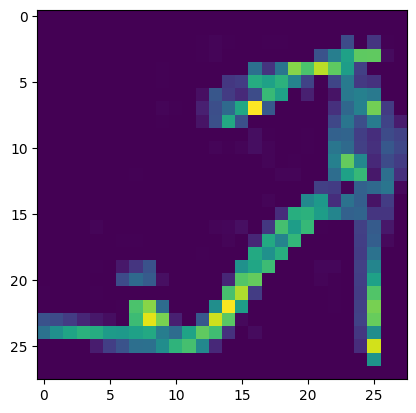

In [5]:
index = 8
image = xtrain[index]
print('Image label : ', ytrain[index])
plt.imshow(image)

In [7]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


<h3>Models</h3>

In [8]:
model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [9]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dense(250, activation = 'relu'),
    keras.layers.Dense(150, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 500)               392500    
                                                                 
 dense_4 (Dense)             (None, 250)               125250    
                                                                 
 dense_5 (Dense)             (None, 150)               37650     
                                                                 
 dense_6 (Dense)             (None, 10)                1510      
                                                                 
Total params: 556910 (2.12 MB)
Trainable params: 556910 (2.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


<h3>Validation and train</h3>

In [ ]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

Image label :  3


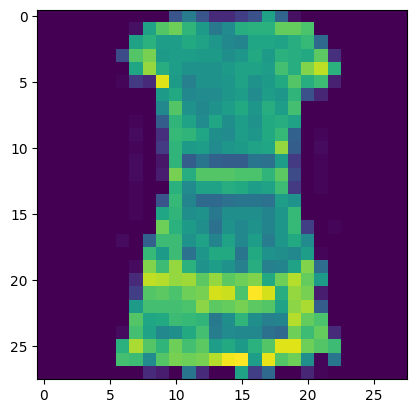

In [12]:
index = 8
image = xtrain[index]
print('Image label : ', ytrain[index])
plt.imshow(image)

<h3>Train Models</h3>

In [13]:
model1.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = 'sgd',
               metrics = ['accuracy'])
history = model1.fit(xtrain, ytrain, epochs = 30, validation_data = (xvalid, yvalid))

2023-10-16 18:16:44.980147: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7113 - accuracy: 0.7654 - val_loss: 0.5273 - val_accuracy: 0.8152
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4898 - accuracy: 0.8288 - val_loss: 0.4412 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4447 - accuracy: 0.8430 - val_loss: 0.4082 - val_accuracy: 0.8620
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4171 - accuracy: 0.8528 - val_loss: 0.3964 - val_accuracy: 0.8608
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3969 - accuracy: 0.8588 - val_loss: 0.4013 - val_accuracy: 0.8568
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3810 - accuracy: 0.8665 - val_loss: 0.3790 - val_accuracy: 0.8646
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3685 - accuracy: 0.8692 - val_loss: 0.3785 - val_accura

In [14]:
model2.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])
history = model2.fit(xtrain, ytrain, epochs = 30, validation_data = (xvalid, yvalid))

Epoch 1/30


2023-10-16 18:22:50.068469: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 20s 11ms/step - loss: 0.4866 - accuracy: 0.8221 - val_loss: 0.4211 - val_accuracy: 0.8498
Epoch 2/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3718 - accuracy: 0.8639 - val_loss: 0.4121 - val_accuracy: 0.8498
Epoch 3/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3338 - accuracy: 0.8751 - val_loss: 0.3351 - val_accuracy: 0.8786
Epoch 4/30
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3084 - accuracy: 0.8847 - val_loss: 0.3101 - val_accuracy: 0.8872
Epoch 5/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2878 - accuracy: 0.8932 - val_loss: 0.3274 - val_accuracy: 0.8822
Epoch 6/30
1719/1719 [==============================] - 23s 13ms/step - loss: 0.2719 - accuracy: 0.8973 - val_loss: 0.3312 - val_accuracy: 0.8800
Epoch 7/30
1719/1719 [==============================] - 17s 10ms/step - loss: 0.2570 - accuracy: 0.9023 - val_loss: 0.3151 - val_accura